In [ ]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import integrate, optimize
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error

# **USA**

In [ ]:
data = pd.read_csv('USA.csv')
data = data.fillna(value=0)
start = 35
new_cases = data['new_cases'][start:]
print(new_cases)

35         18
36          0
37          6
38          1
39          6
        ...  
300    132170
301    168425
302    154316
303    170005
304    188020
Name: new_cases, Length: 270, dtype: int64


In [ ]:
ydata = np.array(new_cases, dtype=float)
xdata = np.array(new_cases.index, dtype=float)
xdatap = xdata

In [ ]:
def sir_model(y, x, beta, gamma):
    S = -beta * y[0] * y[1] / N
    R = gamma * y[1]
    I = -(S + R)
    
    return S, I, R

def fit_odeint(x, beta, gamma):
    return integrate.odeint(sir_model, (S0, I0, R0), x, args=(beta, gamma))[:,1]

In [ ]:
def logistic(t,K,P0,r):
    exp_value=np.exp(r*(t))
    return (K*exp_value*41)/(K+(exp_value-1)*41)

In [ ]:
def seir_model(y, x, beta, gamma, alpha, epsilon):
    S = -beta * y[0] * y[1] / N
    R = gamma * y[1]
    D = alpha * y[1]
    I = epsilon * y[3] - R - D
    E = -(S + epsilon * y[3])
    
    return S, I, R, E, D

def fit_odeint2(x, beta, gamma, alpha, epsilon):
    return integrate.odeint(seir_model, (S0, I0, R0, E0, D0), x, args=(beta, gamma, alpha, epsilon))[:,1]

In [ ]:
N = 3.3e8
I0 = data['total_cases'][start]
E0 = 0.0
R0 = 0.0
D0 = data['total_deaths'][start]
S0 = N - I0 - E0 - D0 - R0

In [ ]:
N = 3.3e8
I0 = data['total_cases'][start]
R0 = data['total_deaths'][start]
S0 = N - I0 - R0

In [ ]:
"""
last_day = max(xdatap)
period = 20
for i in range(1,period):
  xdatap = np.append(xdatap, last_day+i)
"""

'\nlast_day = max(xdatap)\nperiod = 20\nfor i in range(1,period):\n  xdatap = np.append(xdatap, last_day+i)\n'

In [ ]:
popt, pcov = optimize.curve_fit(fit_odeint2, xdata, ydata)
fitted = fit_odeint2(xdatap, *popt)

print(popt)

/usr/local/lib/python3.6/dist-packages/scipy/integrate/odepack.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in double_scalars
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in double_scalars
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in double_scalars
  


[1.38592192 0.23463833 0.49092072 0.04822601]


In [ ]:
popt, pcov = optimize.curve_fit(fit_odeint, xdata, ydata)
fitted = fit_odeint(xdatap, *popt)

print(popt)

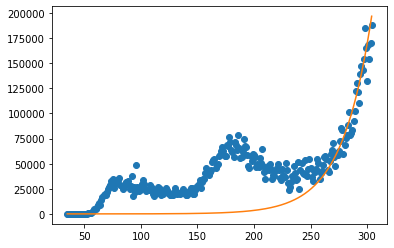

In [ ]:
plt.plot(xdata, ydata, 'o')
plt.plot(xdatap, fitted)
plt.show()

In [ ]:
print(f"(MSE)：{mean_squared_error(ydata, fitted)}")
print(f"(MSE)：{mean_absolute_error(ydata, fitted)}")

(MSE)：1007177567.0078942
(MSE)：25997.892898880556


In [ ]:
date = data['date'][start:]
df = pd.DataFrame({'date': date, 'real_cases': ydata, 'predicted_cases': fitted})
df.to_csv('prediction_USA.csv')

In [ ]:
date = data['date'][start:]
df = pd.DataFrame({'date': date, 'real_deaths': ydata, 'predicted_deaths': fitted})
df.to_csv('death.csv')

In [ ]:
ydata_death = data['new_deaths'][start:]
def fit_odeint2(x, beta, gamma, alpha, epsilon):
    return integrate.odeint(seir_model, (S0, I0, R0, E0, D0), x, args=(beta, gamma, alpha, epsilon))[:,4]
fitted_death = fit_odeint2(xdatap, *popt)

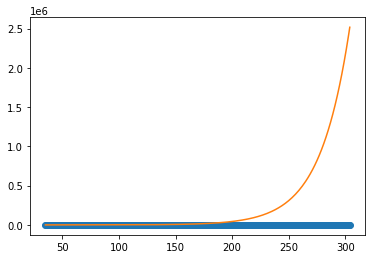

In [ ]:
plt.plot(xdata, ydata_death, 'o')
plt.plot(xdatap, fitted_death)
plt.show()

# **China**

In [ ]:
data = pd.read_csv('China.csv')
data = data.fillna(value=0)
start = 21
new_cases = data['new_cases'][start:]
print(new_cases)

21     151
22     140
23      97
24     259
25     441
      ... 
321      7
322     15
323      8
324     12
325     17
Name: new_cases, Length: 305, dtype: int64


In [ ]:
ydata = np.array(new_cases, dtype=float)
xdata = np.array(new_cases.index, dtype=float)
xdatap = xdata

In [ ]:
def sir_model(y, x, beta, gamma):
    S = -beta * y[0] * y[1] / N
    R = gamma * y[1]
    I = -(S + R)
    
    return S, I, R

def fit_odeint(x, beta, gamma):
    return integrate.odeint(sir_model, (S0, I0, R0), x, args=(beta, gamma))[:,1]

In [ ]:
def logistic(t,K,P0,r):
    exp_value=np.exp(r*(t))
    return (K*exp_value*41)/(K+(exp_value-1)*41)

In [ ]:
def seir_model(y, x, beta, gamma, alpha, epsilon):
    S = -beta * y[0] * y[1] / N
    R = gamma * y[1]
    D = alpha * y[1]
    I = epsilon * y[3] - R - D
    E = -(S + epsilon * y[3])
    
    return S, I, R, E, D

def fit_odeint2(x, beta, gamma, alpha, epsilon):
    return integrate.odeint(seir_model, (S0, I0, R0, E0, D0), x, args=(beta, gamma, alpha, epsilon))[:,1]

In [ ]:
N = 1.1e7
I0 = data['total_cases'][start]
E0 = 0.0
R0 = 0.0
D0 = data['total_deaths'][start]
S0 = N - I0 - E0 - D0 - R0

In [ ]:
N = 1.1e7
I0 = data['total_cases'][start]
R0 = data['total_deaths'][start]
S0 = N - I0 - R0

In [ ]:
"""
last_day = max(xdatap)
period = 20
for i in range(1,period):
  xdatap = np.append(xdatap, last_day+i)
"""

'\nlast_day = max(xdatap)\nperiod = 20\nfor i in range(1,period):\n  xdatap = np.append(xdatap, last_day+i)\n'

In [ ]:
popt, pcov = optimize.curve_fit(fit_odeint2, xdata, ydata)
fitted = fit_odeint2(xdatap, *popt)

print(popt)

/usr/local/lib/python3.6/dist-packages/scipy/integrate/odepack.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in double_scalars
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in double_scalars
  


[  8.75100475   2.4573741    6.0770692  121.85919239]


In [ ]:
popt, pcov = optimize.curve_fit(fit_odeint, xdata, ydata)
fitted = fit_odeint(xdatap, *popt)

print(popt)

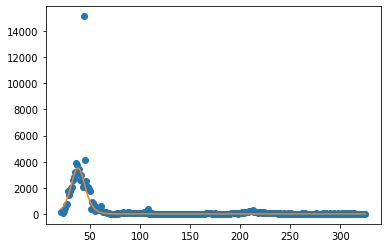

In [ ]:
plt.plot(xdata, ydata, 'o')
plt.plot(xdatap, fitted)
plt.show()

In [ ]:
print(f"(MSE)：{mean_squared_error(ydata, fitted)}")
print(f"(MSE)：{mean_absolute_error(ydata, fitted)}")

(MSE)：567062.3084555086
(MSE)：128.32485293369382


In [ ]:
date = data['date'][start:]
df = pd.DataFrame({'date': date, 'real_cases': ydata, 'predicted_cases': fitted})
df.to_csv('prediction_China.csv')

In [ ]:
date = data['date'][start:]
df = pd.DataFrame({'date': date, 'real_deaths': ydata, 'predicted_deaths': fitted})
df.to_csv('death_China.csv')

In [ ]:
ydata_death = data['new_deaths'][start:]
def fit_odeint2(x, beta, gamma, alpha, epsilon):
    return integrate.odeint(seir_model, (S0, I0, R0, E0, D0), x, args=(beta, gamma, alpha, epsilon))[:,4]
fitted_death = fit_odeint2(xdatap, *popt)

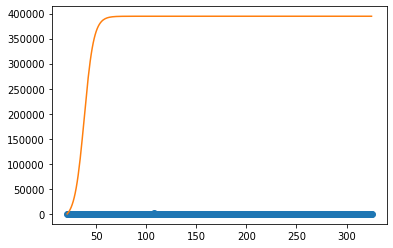

In [ ]:
plt.plot(xdata, ydata_death, 'o')
plt.plot(xdatap, fitted_death)
plt.show()

# **India**

In [ ]:
data = pd.read_csv('India.csv')
data = data.fillna(value=0)
start = 65
new_cases = data['new_cases'][start:]
print(new_cases)

65        22.0
66         1.0
67         2.0
68         3.0
69         0.0
        ...   
321    30548.0
322    29163.0
323    38617.0
324    45576.0
325    45882.0
Name: new_cases, Length: 261, dtype: float64


In [ ]:
ydata = np.array(new_cases, dtype=float)
xdata = np.array(new_cases.index, dtype=float)
xdatap = xdata

In [ ]:
def sir_model(y, x, beta, gamma):
    S = -beta * y[0] * y[1] / N
    R = gamma * y[1]
    I = -(S + R)
    
    return S, I, R

def fit_odeint(x, beta, gamma):
    return integrate.odeint(sir_model, (S0, I0, R0), x, args=(beta, gamma))[:,1]

In [ ]:
def logistic(t,K,P0,r):
    exp_value=np.exp(r*(t))
    return (K*exp_value*41)/(K+(exp_value-1)*41)

In [ ]:
def seir_model(y, x, beta, gamma, alpha, epsilon):
    S = -beta * y[0] * y[1] / N
    R = gamma * y[1]
    D = alpha * y[1]
    I = epsilon * y[3] - R - D
    E = -(S + epsilon * y[3])
    
    return S, I, R, E, D

def fit_odeint2(x, beta, gamma, alpha, epsilon):
    return integrate.odeint(seir_model, (S0, I0, R0, E0, D0), x, args=(beta, gamma, alpha, epsilon))[:,1]

In [ ]:
N = 1.3e9
I0 = data['total_cases'][start]
E0 = 0.0
R0 = 0.0
D0 = data['total_deaths'][start]
S0 = N - I0 - E0 - D0 - R0

In [ ]:
N = 1.3e9
I0 = data['total_cases'][start]
R0 = data['total_deaths'][start]
S0 = N - I0 - R0

In [ ]:
"""
last_day = max(xdatap)
period = 20
for i in range(1,period):
  xdatap = np.append(xdatap, last_day+i)
"""

'\nlast_day = max(xdatap)\nperiod = 20\nfor i in range(1,period):\n  xdatap = np.append(xdatap, last_day+i)\n'

In [ ]:
popt, pcov = optimize.curve_fit(fit_odeint2, xdata, ydata)
fitted = fit_odeint2(xdatap, *popt)

print(popt)

[-0.14040369 -0.04472221 -0.0453624   0.02417329]


/usr/local/lib/python3.6/dist-packages/scipy/integrate/odepack.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


In [ ]:
popt, pcov = optimize.curve_fit(fit_odeint, xdata, ydata)
fitted = fit_odeint(xdatap, *popt)

print(popt)

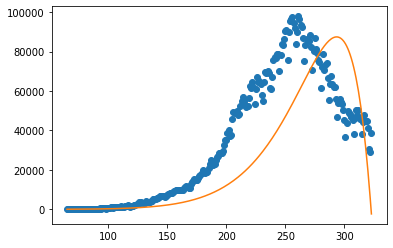

In [ ]:
plt.plot(xdata[:259], ydata[:259], 'o')
plt.plot(xdatap[:259], fitted[:259])
plt.show()

In [ ]:
print(f"(MSE)：{mean_squared_error(ydata, fitted)}")
print(f"(MSE)：{mean_absolute_error(ydata, fitted)}")

(MSE)：487993530.27414244
(MSE)：16215.742235221254


In [ ]:
date = data['date'][start:]
df = pd.DataFrame({'date': date, 'real_cases': ydata, 'predicted_cases': fitted})
df.to_csv('prediction_India.csv')

In [ ]:
date = data['date'][start:]
df = pd.DataFrame({'date': date, 'real_deaths': ydata, 'predicted_deaths': fitted})
df.to_csv('death_India.csv')

In [ ]:
ydata_death = data['new_deaths'][start:]
def fit_odeint2(x, beta, gamma, alpha, epsilon):
    return integrate.odeint(seir_model, (S0, I0, R0, E0, D0), x, args=(beta, gamma, alpha, epsilon))[:,4]
fitted_death = fit_odeint2(xdatap, *popt)

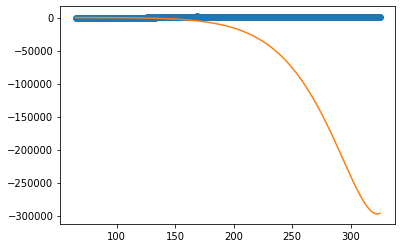

In [ ]:
plt.plot(xdata, ydata_death, 'o')
plt.plot(xdatap, fitted_death)
plt.show()